<a href="https://colab.research.google.com/github/aumair472/Eda_HRAnalytics_Project/blob/main/EDA_HRAnalytics_Project_UmairAli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#HR ANALYTICS DATA SET
##TASK 1 - Data Audit & Cleaning

##LOAD THE DATASET


In [1]:
import pandas as pd

hr_dataframe = pd.read_csv('/content/drive/MyDrive/DataSet/HR_Analytics_Dataset.csv')

In [2]:
# Display first few rows

hr_dataframe.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Markting,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Opperations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Markting,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Markting,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technoogy,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


#A. Data Structure Assessment
#.info()

In [3]:
print('Data Type for each column are:')
print(hr_dataframe.info())

Data Type for each column are:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54908 entries, 0 to 54907
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54908 non-null  int64  
 1   department            52166 non-null  object 
 2   region                54809 non-null  object 
 3   education             49876 non-null  object 
 4   gender                52165 non-null  object 
 5   recruitment_channel   54908 non-null  object 
 6   no_of_trainings       54908 non-null  int64  
 7   age                   54908 non-null  int64  
 8   previous_year_rating  48251 non-null  float64
 9   length_of_service     54908 non-null  int64  
 10  KPIs_met >80%         54908 non-null  int64  
 11  awards_won?           54908 non-null  int64  
 12  avg_training_score    54908 non-null  int64  
 13  is_promoted           54908 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memo

#.describe()

In [4]:
print('Descriptive Statistics for Numeric Columns:')
print(hr_dataframe.describe())

print('\nDescriptive Statistics for Categorical Columns:')
print(hr_dataframe.describe(include='O'))

print('\nDescriptive Statistics for All Columns:')
print(hr_dataframe.describe(include='all'))

Descriptive Statistics for Numeric Columns:
        employee_id  no_of_trainings           age  previous_year_rating  \
count  54908.000000     54908.000000  54908.000000          48251.000000   
mean   39191.527464         1.253133     34.861896              3.327496   
std    22588.280882         0.609519      7.911756              1.260026   
min        1.000000         1.000000     20.000000              1.000000   
25%    19662.250000         1.000000     29.000000              3.000000   
50%    39215.000000         1.000000     33.000000              3.000000   
75%    58728.250000         1.000000     39.000000              4.000000   
max    78298.000000        10.000000    119.000000              5.000000   

       length_of_service  KPIs_met >80%   awards_won?  avg_training_score  \
count       54908.000000   54908.000000  54908.000000        54908.000000   
mean            5.865211       0.352025      0.023148           63.545075   
std             4.264690       0.477606 

#Unique Values per Columns

In [5]:
print('Unique Values per Column:\n')

for col in hr_dataframe.columns:
  print(f'{col}: {hr_dataframe[col].nunique()}')

Unique Values per Column:

employee_id: 54808
department: 9
region: 35
education: 3
gender: 2
recruitment_channel: 3
no_of_trainings: 10
age: 73
previous_year_rating: 5
length_of_service: 35
KPIs_met >80%: 2
awards_won?: 2
avg_training_score: 104
is_promoted: 2


#Unique Count per Column

In [6]:
print('Values Count per Column:\n')

for col in hr_dataframe.columns:
  print(f'{hr_dataframe[col].value_counts()}')
  print('-------------------------------------')

Values Count per Column:

employee_id
4626     2
58052    2
26653    2
20899    2
5274     2
        ..
74496    1
2548     1
45275    1
49681    1
56618    1
Name: count, Length: 54808, dtype: int64
-------------------------------------
department
Sales & Markting    16042
Opperations         10795
Procurement          6800
Technoogy            6789
Analytics            5088
Finance              2422
HR                   2298
Legal                 993
R&D                   939
Name: count, dtype: int64
-------------------------------------
region
region_2     12341
region_22     6428
region_7      4840
region_15     2813
region_13     2651
region_26     2262
region_31     1935
region_4      1698
region_27     1658
region_16     1463
region_28     1317
region_11     1314
region_23     1171
region_29      995
region_32      947
region_19      876
region_20      850
region_14      827
region_25      821
region_17      798
region_5       768
region_6       687
region_30      656
region_8 

#B. Cleaning

#Missing Values per Column

In [7]:
print(hr_dataframe.info())

print('Missing Values per Column:\n')
print(hr_dataframe.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54908 entries, 0 to 54907
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54908 non-null  int64  
 1   department            52166 non-null  object 
 2   region                54809 non-null  object 
 3   education             49876 non-null  object 
 4   gender                52165 non-null  object 
 5   recruitment_channel   54908 non-null  object 
 6   no_of_trainings       54908 non-null  int64  
 7   age                   54908 non-null  int64  
 8   previous_year_rating  48251 non-null  float64
 9   length_of_service     54908 non-null  int64  
 10  KPIs_met >80%         54908 non-null  int64  
 11  awards_won?           54908 non-null  int64  
 12  avg_training_score    54908 non-null  int64  
 13  is_promoted           54908 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB
None
Missing 

#Percentage of Missing Values

In [8]:
print('Percentage of Missing Values:')

missing_values = hr_dataframe.isnull().sum()
missing_percentage = (missing_values / len(hr_dataframe) ) * 100

print(missing_percentage)

Percentage of Missing Values:
employee_id              0.000000
department               4.993808
region                   0.180302
education                9.164420
gender                   4.995629
recruitment_channel      0.000000
no_of_trainings          0.000000
age                      0.000000
previous_year_rating    12.123916
length_of_service        0.000000
KPIs_met >80%            0.000000
awards_won?              0.000000
avg_training_score       0.000000
is_promoted              0.000000
dtype: float64


In [9]:
hr_dataframe.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Markting,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Opperations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Markting,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Markting,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technoogy,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [10]:
categorical_col = hr_dataframe.select_dtypes(include=['object']).columns
print(f'Categorical Columns: {categorical_col}')

print('\n-----------------------------------------------------')
numerical_col = hr_dataframe.select_dtypes(include=['int64', 'float64']).columns
print(f'Numerical Columns: {numerical_col}')

Categorical Columns: Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object')

-----------------------------------------------------
Numerical Columns: Index(['employee_id', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')


#Missing Values for Numerical and Categorical

In [11]:
print('Missing Values for the Numerical Columns:\n')

for col in numerical_col:
  print(f'{col}: {hr_dataframe[col].isnull().sum()}')

print('\nMissing Values for the Categorical Columns:\n')

for col in categorical_col:
  print(f'{col}: {hr_dataframe[col].isnull().sum()}')


Missing Values for the Numerical Columns:

employee_id: 0
no_of_trainings: 0
age: 0
previous_year_rating: 6657
length_of_service: 0
KPIs_met >80%: 0
awards_won?: 0
avg_training_score: 0
is_promoted: 0

Missing Values for the Categorical Columns:

department: 2742
region: 99
education: 5032
gender: 2743
recruitment_channel: 0


#Missing Percentage for Numerical Values

In [12]:
print('Missing Value Percentage for Numerical Values:\n')

for col in numerical_col:
  missing_percentage = (hr_dataframe[col].isnull().sum() / len(hr_dataframe)) * 100
  print(f'{col}: {missing_percentage:.2f}%')

Missing Value Percentage for Numerical Values:

employee_id: 0.00%
no_of_trainings: 0.00%
age: 0.00%
previous_year_rating: 12.12%
length_of_service: 0.00%
KPIs_met >80%: 0.00%
awards_won?: 0.00%
avg_training_score: 0.00%
is_promoted: 0.00%


#Checking Histogram Analysis to check either Skewed Or Normal Distribution

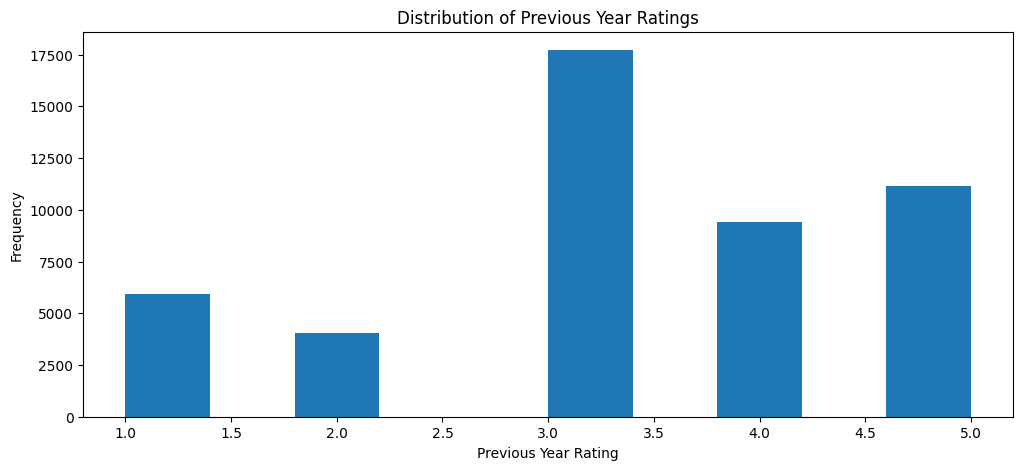

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.hist(hr_dataframe['previous_year_rating'])
plt.xlabel('Previous Year Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Previous Year Ratings')
plt.show()

In [14]:
hr_dataframe['previous_year_rating'].median()

3.0

In [15]:
# Fill the missing values in Previous Year Rating by median because you can see in the image, it's Skewed

hr_dataframe['previous_year_rating'].fillna(hr_dataframe['previous_year_rating'].median(), inplace=True)

print(hr_dataframe.isnull().sum())

employee_id                0
department              2742
region                    99
education               5032
gender                  2743
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating       0
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64


/tmp/ipython-input-2107049503.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hr_dataframe['previous_year_rating'].fillna(hr_dataframe['previous_year_rating'].median(), inplace=True)


#Missing Values Percentage for the Categorical Columns

In [16]:
# Missing Values Percentage for the categorical Columns

print('Missing Values Percentage for the Categorical Columns:\n')

for col in categorical_col:
  missing_percentage = (hr_dataframe[col].isnull().sum() / len(hr_dataframe)) * 100
  print(f'Missing Percentage of Column {col}: {missing_percentage:.2f}%')
  print(f'{col}: {hr_dataframe[col].value_counts()}')
  print('----------------------------------------')



Missing Values Percentage for the Categorical Columns:

Missing Percentage of Column department: 4.99%
department: department
Sales & Markting    16042
Opperations         10795
Procurement          6800
Technoogy            6789
Analytics            5088
Finance              2422
HR                   2298
Legal                 993
R&D                   939
Name: count, dtype: int64
----------------------------------------
Missing Percentage of Column region: 0.18%
region: region
region_2     12341
region_22     6428
region_7      4840
region_15     2813
region_13     2651
region_26     2262
region_31     1935
region_4      1698
region_27     1658
region_16     1463
region_28     1317
region_11     1314
region_23     1171
region_29      995
region_32      947
region_19      876
region_20      850
region_14      827
region_25      821
region_17      798
region_5       768
region_6       687
region_30      656
region_8       656
region_10      650
region_1       609
region_24      509
re

#Clean Categorical Mappings

In [17]:
hr_dataframe['gender'] = hr_dataframe['gender'].fillna('Unknown')

hr_dataframe['education'] = hr_dataframe['education'].fillna('Unknown')

hr_dataframe['department'] = hr_dataframe['department'].fillna(hr_dataframe['department'].mode()[0])

hr_dataframe['region'] = hr_dataframe['region'].fillna(hr_dataframe['region'].mode()[0])


In [18]:
hr_dataframe.isnull().sum()

,0
employee_id,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0


#Fix Spelling Errors

In [19]:
# Fix Spelling Errors in Categorical Columns
for x in categorical_col:
  print('Columns:', x)
  print(hr_dataframe[x].unique())
  print('---------------------------------')

Columns: department
['Sales & Markting' 'Opperations' 'Technoogy' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']
---------------------------------
Columns: region
['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18' 'REGION_7']
---------------------------------
Columns: education
["Master's & above" "Bachelor's" 'Unknown' 'Below Secondary']
---------------------------------
Columns: gender
['f' 'm' 'Unknown']
---------------------------------
Columns: recruitment_channel
['sourcing' 'other' 'referred']
---------------------------------


In [20]:
for col in categorical_col:
  hr_dataframe[col] = hr_dataframe[col].astype(str).str.strip().str.title()

print('Cleaned categorical Columns: ' , categorical_col.to_list())

print('\nUnique values & counts for "Department" after cleaning:')
print(hr_dataframe['department'].value_counts())

print('\nUnique values & counts for "Education" after cleaning:')
print(hr_dataframe['education'].value_counts())

print('\nUnique values & counts for "Region" after cleaning:')
print(hr_dataframe['region'].value_counts())

print('\nUnique values & counts for "Gender" after cleaning:')
print(hr_dataframe['gender'].value_counts())

print('\nUnique values & counts for "Recruitment Channel" after cleaning:')
print(hr_dataframe['recruitment_channel'].value_counts())

print('\nDisplaying df.info() and df.isnull() to confirm current State:')
print(hr_dataframe.info())
print(hr_dataframe.isnull().sum())

Cleaned categorical Columns:  ['department', 'region', 'education', 'gender', 'recruitment_channel']

Unique values & counts for "Department" after cleaning:
department
Sales & Markting    18784
Opperations         10795
Procurement          6800
Technoogy            6789
Analytics            5088
Finance              2422
Hr                   2298
Legal                 993
R&D                   939
Name: count, dtype: int64

Unique values & counts for "Education" after cleaning:
education
Bachelor'S          34909
Master'S & Above    14209
Unknown              5032
Below Secondary       758
Name: count, dtype: int64

Unique values & counts for "Region" after cleaning:
region
Region_2     12440
Region_22     6428
Region_7      4841
Region_15     2813
Region_13     2651
Region_26     2262
Region_31     1935
Region_4      1698
Region_27     1658
Region_16     1463
Region_28     1317
Region_11     1314
Region_23     1171
Region_29      995
Region_32      947
Region_19      876
Region_20  

In [21]:
hr_dataframe[categorical_col].head()

,department,region,education,gender,recruitment_channel
0,Sales & Markting,Region_7,Master'S & Above,F,Sourcing
1,Opperations,Region_22,Bachelor'S,M,Other
2,Sales & Markting,Region_19,Bachelor'S,M,Sourcing
3,Sales & Markting,Region_23,Bachelor'S,M,Other
4,Technoogy,Region_26,Bachelor'S,M,Other


In [22]:
department_corrections = {
    "Sales & Markting": "Sales & Marketing",
    "Opperations": "Operations",
    "Technoogy": "Technology"
}

hr_dataframe['department'] = hr_dataframe['department'].replace(department_corrections)

hr_dataframe['department'].value_counts(dropna=False)


,count
department,
Sales & Marketing,18784
Operations,10795
Procurement,6800
Technology,6789
Analytics,5088
Finance,2422
Hr,2298
Legal,993
R&D,939


In [23]:
# Convert Columns to Appropriate Data Types

bin_cols = ['KPIs_met >80%', 'awards_won?', 'is_promoted']

for col in bin_cols:
  hr_dataframe[col] = hr_dataframe[col].astype('int')

for col in categorical_col:
  hr_dataframe[col] = hr_dataframe[col].astype('category')

hr_dataframe.dtypes

,0
employee_id,int64
department,category
region,category
education,category
gender,category
recruitment_channel,category
no_of_trainings,int64
age,int64
previous_year_rating,float64
length_of_service,int64


In [24]:
hr_dataframe['education'] = hr_dataframe['education'].astype(str)

#Ensure consistent formatting of region and educational levels

In [25]:
edu_map = {
    "Bachelor'S": "Bachelor's",
    "Master'S & Above": "Master's & Above",
    "Below Secondary": "Below Secondary",
    "Unknown": "Unknown"
}

hr_dataframe['education'] = hr_dataframe['education'].replace(edu_map)

In [26]:
hr_dataframe

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,Region_7,Master's & Above,F,Sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,Region_22,Bachelor's,M,Other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,Region_19,Bachelor's,M,Sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,Region_23,Bachelor's,M,Other,2,39,1.0,10,0,0,50,0
4,48945,Technology,Region_26,Bachelor's,M,Other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54903,55316,Technology,Region_2,Bachelor's,F,Sourcing,1,25,3.0,2,0,0,79,0
54904,56850,Technology,Region_9,Bachelor's,M,Sourcing,1,25,1.0,2,0,0,82,0
54905,17804,Procurement,Region_26,Bachelor's,F,Other,1,31,5.0,4,1,0,69,1
54906,29705,Sales & Marketing,Region_19,Bachelor's,M,Other,1,42,4.0,3,0,0,49,0


In [27]:
hr_dataframe['education'] = hr_dataframe['education'].astype('category')

In [28]:
print(hr_dataframe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54908 entries, 0 to 54907
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   employee_id           54908 non-null  int64   
 1   department            54908 non-null  category
 2   region                54908 non-null  category
 3   education             54908 non-null  category
 4   gender                54908 non-null  category
 5   recruitment_channel   54908 non-null  category
 6   no_of_trainings       54908 non-null  int64   
 7   age                   54908 non-null  int64   
 8   previous_year_rating  54908 non-null  float64 
 9   length_of_service     54908 non-null  int64   
 10  KPIs_met >80%         54908 non-null  int64   
 11  awards_won?           54908 non-null  int64   
 12  avg_training_score    54908 non-null  int64   
 13  is_promoted           54908 non-null  int64   
dtypes: category(5), float64(1), int64(8)
memory usage: 4.0

In [29]:
print(hr_dataframe.isnull().sum())

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64


In [30]:
print(hr_dataframe.dtypes)

employee_id                int64
department              category
region                  category
education               category
gender                  category
recruitment_channel     category
no_of_trainings            int64
age                        int64
previous_year_rating     float64
length_of_service          int64
KPIs_met >80%              int64
awards_won?                int64
avg_training_score         int64
is_promoted                int64
dtype: object


#Remove/Handle Duplicates

In [31]:
# Remove duplicate records (if any)

duplicate_count = hr_dataframe.duplicated().sum()

print("Number of duplicate rows:", duplicate_count)

Number of duplicate rows: 100


In [32]:
hr_dataframe = hr_dataframe.drop_duplicates()

In [33]:
print(hr_dataframe.duplicated().sum())

0


In [34]:
hr_dataframe.loc[:, 'region'] = hr_dataframe['region'].str.replace("Region_", "Region ", regex=False)

/tmp/ipython-input-1301273722.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Region 7' 'Region 22' 'Region 19' ... 'Region 1' 'Region 9' 'Region 22']' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  hr_dataframe.loc[:, 'region'] = hr_dataframe['region'].str.replace("Region_", "Region ", regex=False)


In [35]:
hr_dataframe['region'].head()

,region
0,Region 7
1,Region 22
2,Region 19
3,Region 23
4,Region 26


In [36]:
hr_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   employee_id           54808 non-null  int64   
 1   department            54808 non-null  category
 2   region                54808 non-null  object  
 3   education             54808 non-null  category
 4   gender                54808 non-null  category
 5   recruitment_channel   54808 non-null  category
 6   no_of_trainings       54808 non-null  int64   
 7   age                   54808 non-null  int64   
 8   previous_year_rating  54808 non-null  float64 
 9   length_of_service     54808 non-null  int64   
 10  KPIs_met >80%         54808 non-null  int64   
 11  awards_won?           54808 non-null  int64   
 12  avg_training_score    54808 non-null  int64   
 13  is_promoted           54808 non-null  int64   
dtypes: category(4), float64(1), int64(8), object(1)
memory usag

In [37]:
for col in categorical_col:
  hr_dataframe[col] = hr_dataframe[col].astype('object')

/tmp/ipython-input-765222094.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hr_dataframe[col] = hr_dataframe[col].astype('object')
/tmp/ipython-input-765222094.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hr_dataframe[col] = hr_dataframe[col].astype('object')
/tmp/ipython-input-765222094.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

In [38]:
hr_dataframe.dtypes

,0
employee_id,int64
department,object
region,object
education,object
gender,object
recruitment_channel,object
no_of_trainings,int64
age,int64
previous_year_rating,float64
length_of_service,int64


In [39]:
hr_dataframe.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,Region 7,Master's & Above,F,Sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,Region 22,Bachelor's,M,Other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,Region 19,Bachelor's,M,Sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,Region 23,Bachelor's,M,Other,2,39,1.0,10,0,0,50,0
4,48945,Technology,Region 26,Bachelor's,M,Other,1,45,3.0,2,0,0,73,0


#Task 2 - Univariate Analysis

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Imported matplotlib.pyplot as plt and seaborn as sns.")

numerical_cols = hr_dataframe.select_dtypes(include=['number']).columns.tolist()
categorical_cols = hr_dataframe.select_dtypes(include='object').columns.tolist()

# Exclude 'Employee' and 'Year' from numerical columns as they are often treated as identifiers or categories.
numerical_cols.remove('employee_id')
# 'Year' can be treated as categorical for analysis, or numerical for time-series.
# For univariate analysis, it makes more sense to treat 'Year' as categorical due to limited unique values (2015, 2016).
# Let's move 'Year' to categorical_cols for now, if it's there.
if 'Year' in numerical_cols:
    numerical_cols.remove('Year')
    categorical_cols.append('Year')

# Also exclude 'Date' from categorical_cols for now, as it's a date object and will be handled separately if needed.
if 'Date' in categorical_cols:
    categorical_cols.remove('Date')


print(f"Numerical columns identified for plotting: {numerical_cols}")
print(f"Categorical columns identified for plotting: {categorical_cols}")

Imported matplotlib.pyplot as plt and seaborn as sns.
Numerical columns identified for plotting: ['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted']
Categorical columns identified for plotting: ['department', 'region', 'education', 'gender', 'recruitment_channel']


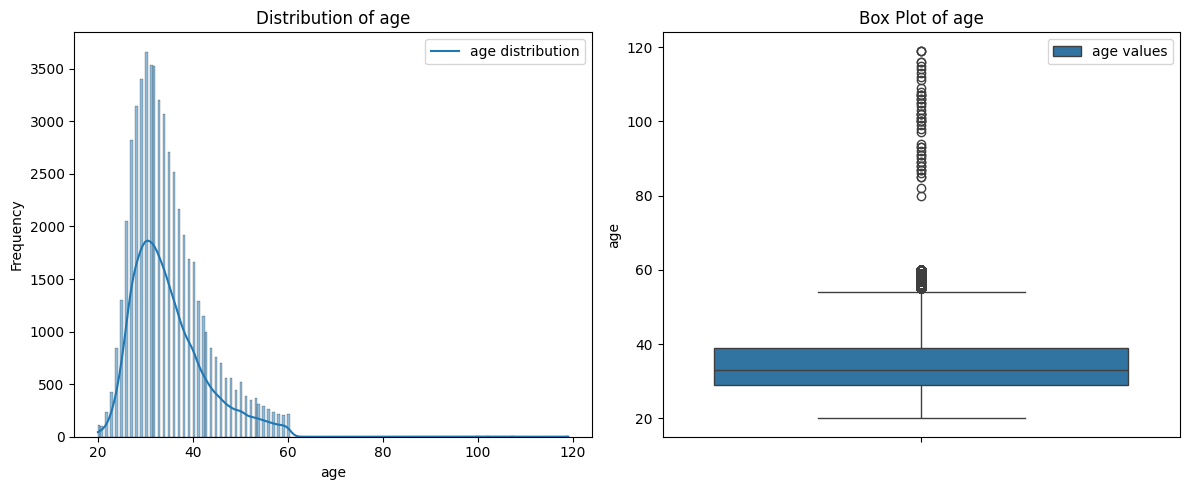

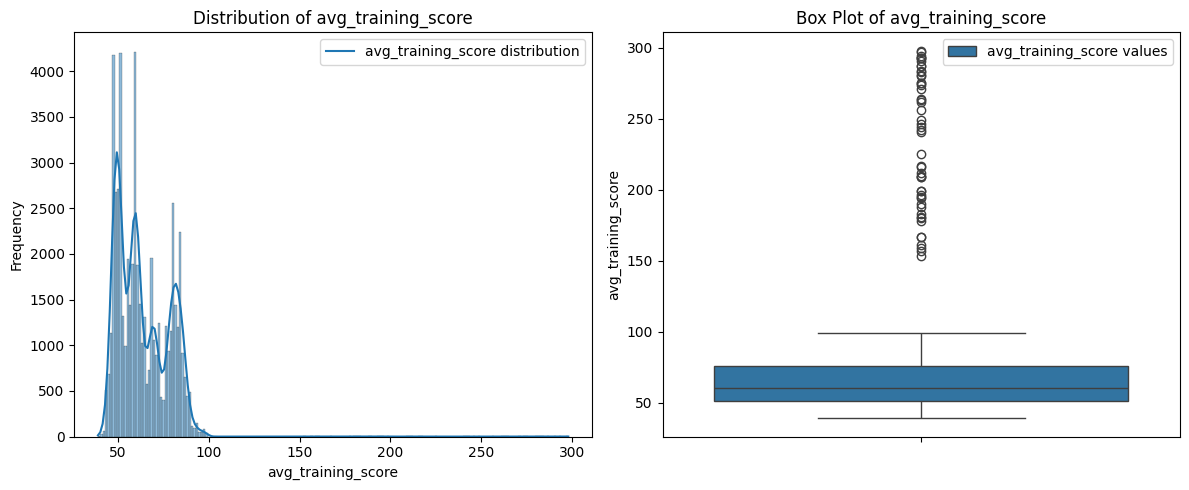

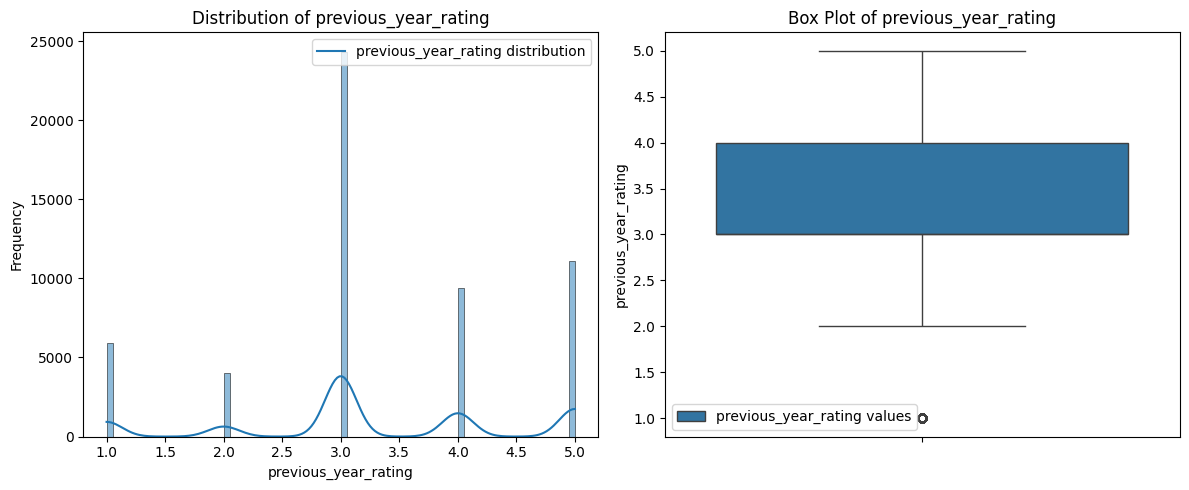

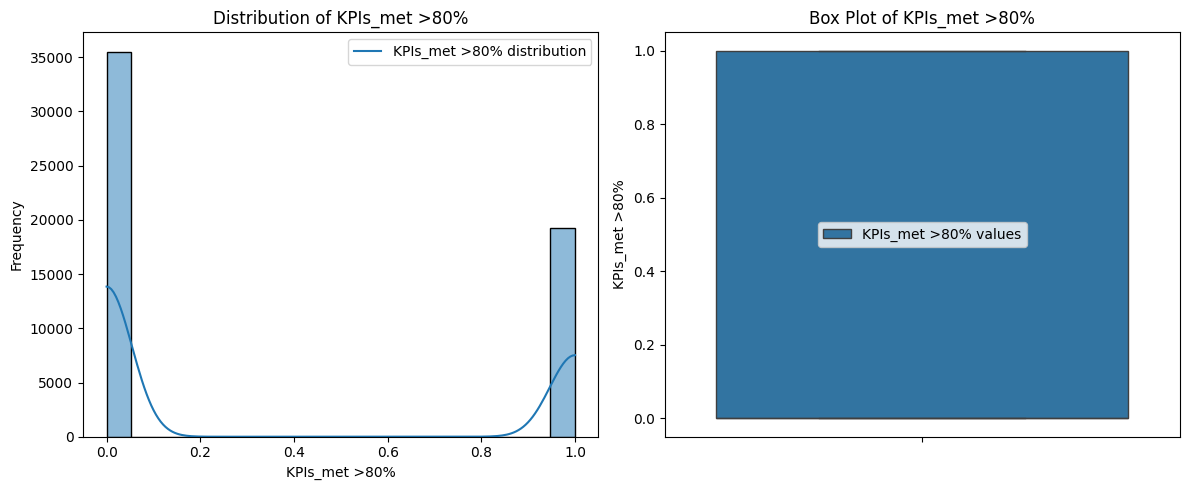

In [41]:
numerical_cols = ['age','avg_training_score','previous_year_rating','KPIs_met >80%']

for col in numerical_cols:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(hr_dataframe[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend([f'{col} distribution'])

    # Box Plot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=hr_dataframe[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.legend([f'{col} values'])

    plt.tight_layout()
    plt.show()

/tmp/ipython-input-3086395992.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


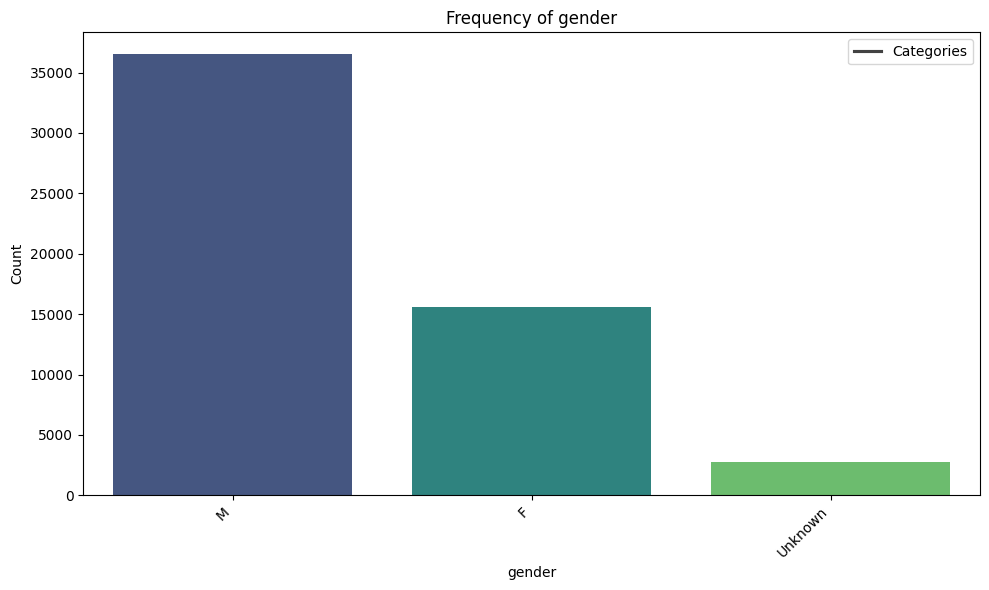

/tmp/ipython-input-3086395992.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


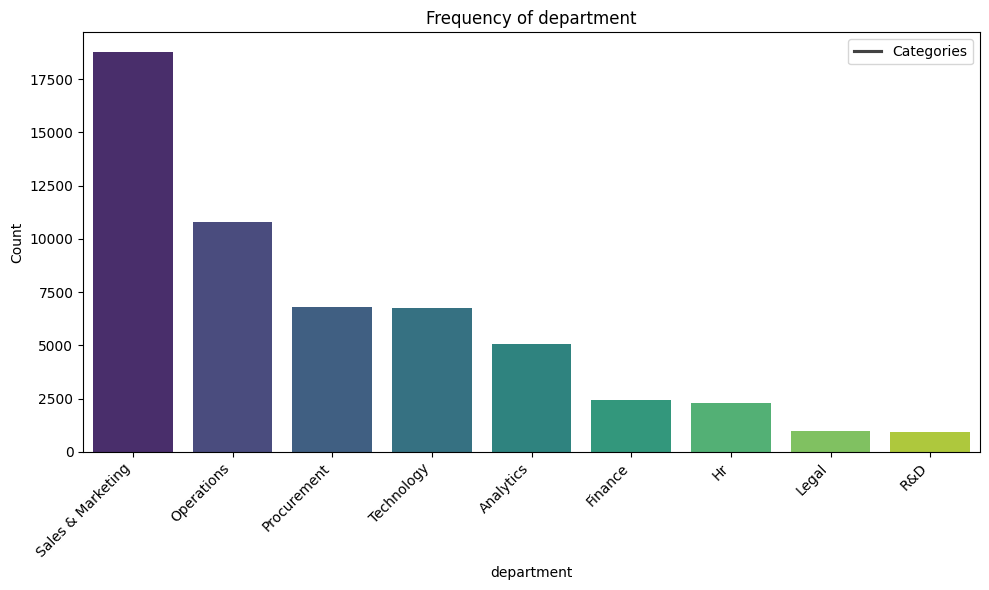

/tmp/ipython-input-3086395992.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index[:top_n], y=counts.values[:top_n], palette='viridis')


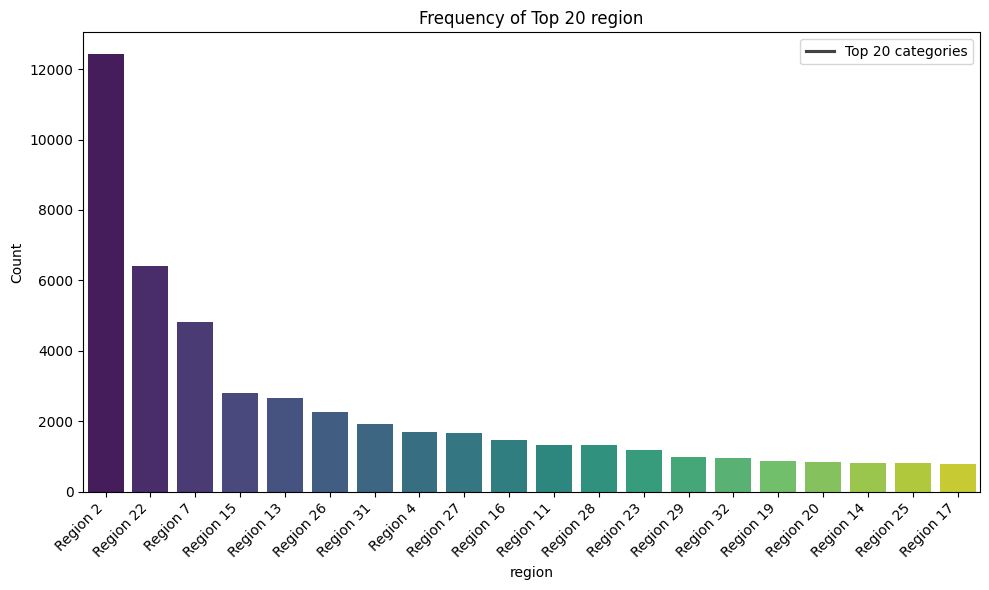

In [42]:
categorical_cols= ['gender','department','region']

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    counts = hr_dataframe[col].value_counts()

    # For columns with too many unique values, display top N for readability
    if len(counts) > 20:
        top_n = 20
        sns.barplot(x=counts.index[:top_n], y=counts.values[:top_n], palette='viridis')
        plt.title(f'Frequency of Top {top_n} {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.legend([f'Top {top_n} categories'])
    else:
        sns.barplot(x=counts.index, y=counts.values, palette='viridis')
        plt.title(f'Frequency of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.legend(['Categories'])

    plt.tight_layout()
    plt.show()

/tmp/ipython-input-3227513100.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_promo, x='gender', y='is_promoted', palette='viridis')


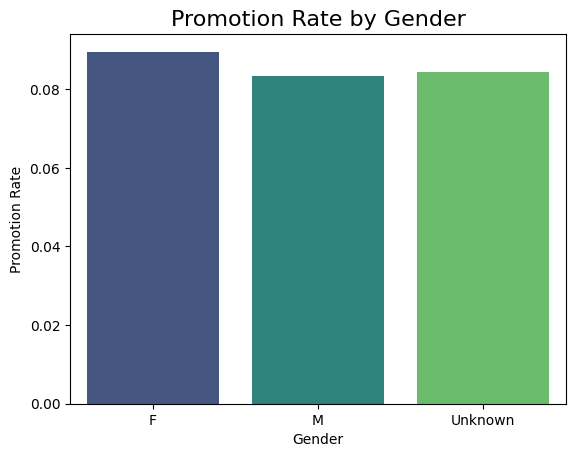

In [43]:
gender_promo = hr_dataframe.groupby('gender')['is_promoted'].mean().reset_index()

sns.barplot(data=gender_promo, x='gender', y='is_promoted', palette='viridis')
plt.title("Promotion Rate by Gender", fontsize=16)
plt.ylabel("Promotion Rate")
plt.xlabel("Gender")
plt.show()

#Task 3 - Bivariate Analysis With Promotion

#Promotion Rate by department

/tmp/ipython-input-1187971337.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dept_promo, x='department', y='is_promoted', palette='coolwarm')


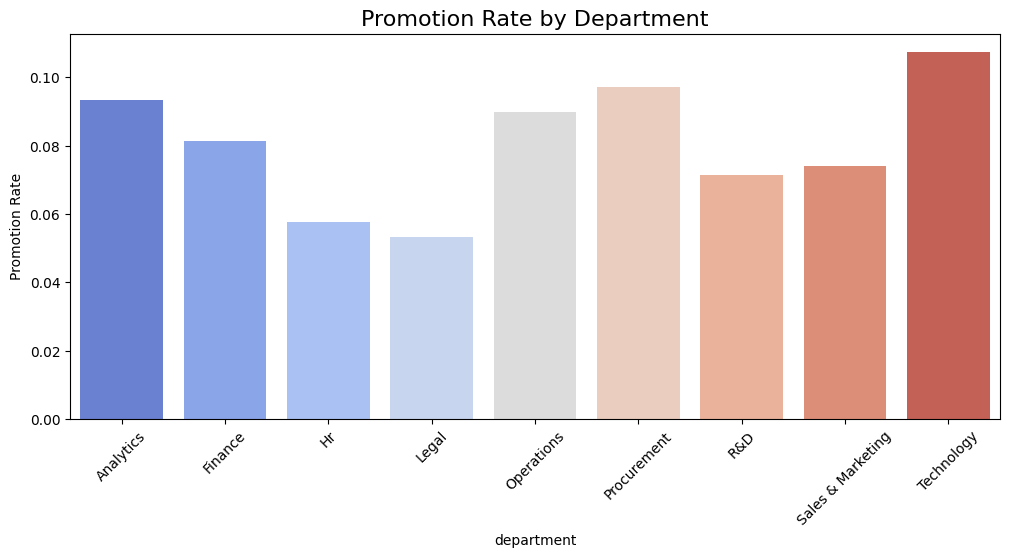

In [44]:
dept_promo = hr_dataframe.groupby('department')['is_promoted'].mean().reset_index()

plt.figure(figsize=(12,5))
sns.barplot(data=dept_promo, x='department', y='is_promoted', palette='coolwarm')
plt.title("Promotion Rate by Department", fontsize=16)
plt.ylabel("Promotion Rate")
plt.xticks(rotation=45)
plt.show()

#Promotion Rate vs Previous Rating

/tmp/ipython-input-304828980.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=hr_dataframe, x='is_promoted', y='previous_year_rating', palette='flare')


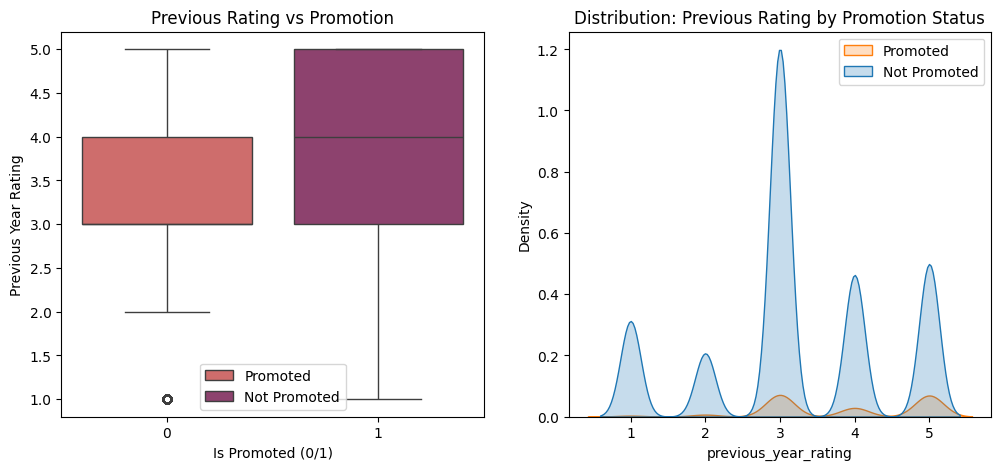

In [45]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=hr_dataframe, x='is_promoted', y='previous_year_rating', palette='flare')
plt.title("Previous Rating vs Promotion")
plt.xlabel("Is Promoted (0/1)")
plt.ylabel("Previous Year Rating")
plt.legend(['Promoted', 'Not Promoted'])

# Side-by-side distribution
plt.subplot(1, 2, 2)
sns.kdeplot(data=hr_dataframe, x='previous_year_rating', hue='is_promoted', fill=True)
plt.title("Distribution: Previous Rating by Promotion Status")
plt.legend(['Promoted', 'Not Promoted'])
plt.show()

#Promotion rate vs Training Score

/tmp/ipython-input-2375979350.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=hr_dataframe, x='is_promoted', y='avg_training_score', palette='Set2')


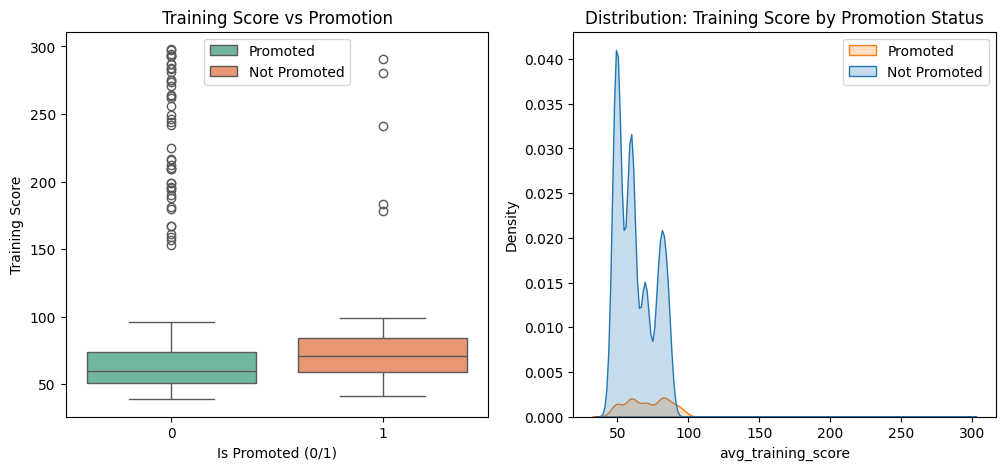

In [46]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

sns.boxplot(data=hr_dataframe, x='is_promoted', y='avg_training_score', palette='Set2')
plt.title("Training Score vs Promotion")
plt.xlabel("Is Promoted (0/1)")
plt.ylabel("Training Score")
plt.legend(['Promoted', 'Not Promoted'])


# Distribution
plt.subplot(1, 2, 2)
sns.kdeplot(data=hr_dataframe, x='avg_training_score', hue='is_promoted', fill=True)
plt.title("Distribution: Training Score by Promotion Status")
plt.legend(['Promoted', 'Not Promoted'])
plt.show()

#KPI > 80% effect

/tmp/ipython-input-1285552974.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=kpi_promo, x='KPIs_met >80%', y='is_promoted', palette='rocket')


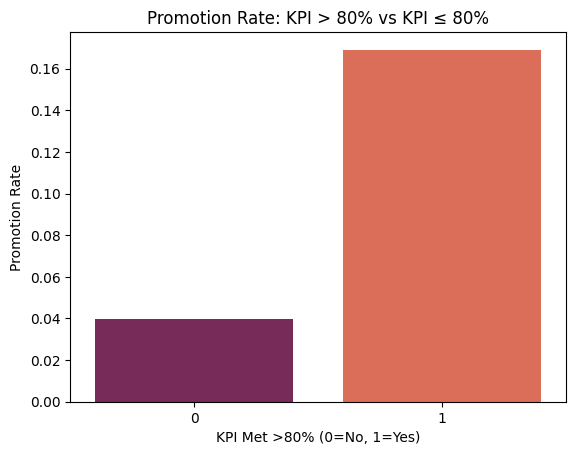

In [47]:
kpi_promo = hr_dataframe.groupby('KPIs_met >80%')['is_promoted'].mean().reset_index()

sns.barplot(data=kpi_promo, x='KPIs_met >80%', y='is_promoted', palette='rocket')
plt.title("Promotion Rate: KPI > 80% vs KPI ≤ 80%")
plt.xlabel("KPI Met >80% (0=No, 1=Yes)")
plt.ylabel("Promotion Rate")
plt.show()

#Awards

/tmp/ipython-input-1382761855.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=awards_promo, x='awards_won?', y='is_promoted', palette='mako')


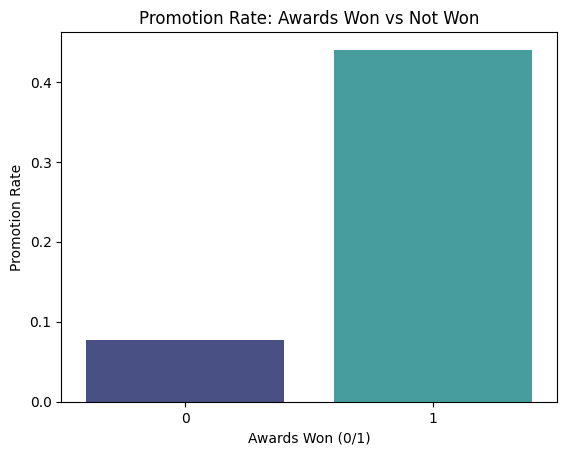

In [48]:
awards_promo = hr_dataframe.groupby('awards_won?')['is_promoted'].mean().reset_index()

sns.barplot(data=awards_promo, x='awards_won?', y='is_promoted', palette='mako')
plt.title("Promotion Rate: Awards Won vs Not Won")
plt.xlabel("Awards Won (0/1)")
plt.ylabel("Promotion Rate")
plt.show()

/tmp/ipython-input-200360294.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=hr_dataframe, x='is_promoted', y='age', palette='autumn')


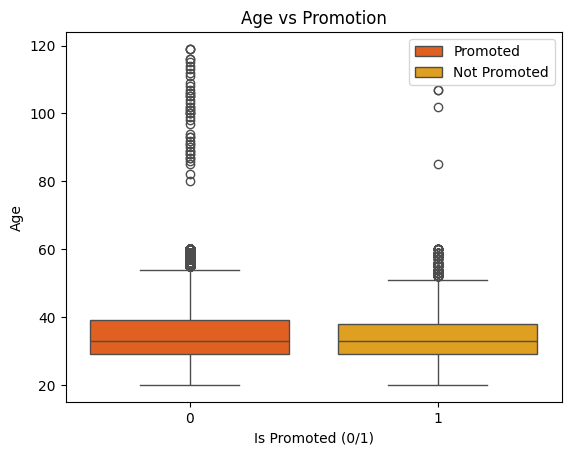

In [49]:
sns.boxplot(data=hr_dataframe, x='is_promoted', y='age', palette='autumn')
plt.title("Age vs Promotion")
plt.xlabel("Is Promoted (0/1)")
plt.ylabel("Age")
plt.legend(['Promoted', 'Not Promoted'])
plt.show()

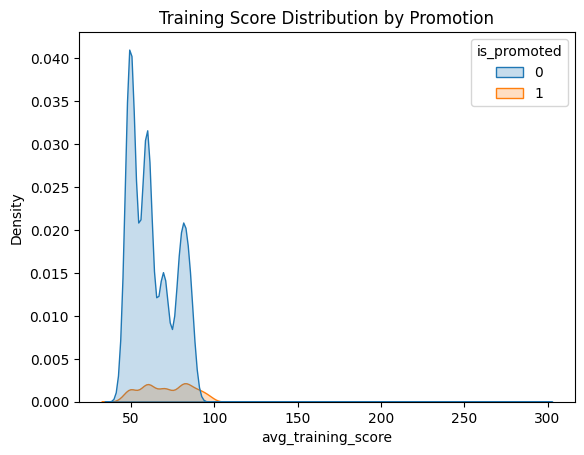

In [50]:
sns.kdeplot(data=hr_dataframe, x='avg_training_score', hue='is_promoted', fill=True)
plt.title("Training Score Distribution by Promotion")
plt.show()

##1. Strongest drivers of promotion:

- KPI achievement > 80%

- Previous year rating

- Training score

- Awards

##2. Fairness concerns:

Some departments show very low promotion rates, even for high performers.

Gender differences exist but may be small — requires deeper analysis.

##3. Operational insights:

Training appears effective: higher scores correlate with more promotions.

High-rated employees have far higher promotion success.

#Multivariate Analysis

#Correlation Heatmap

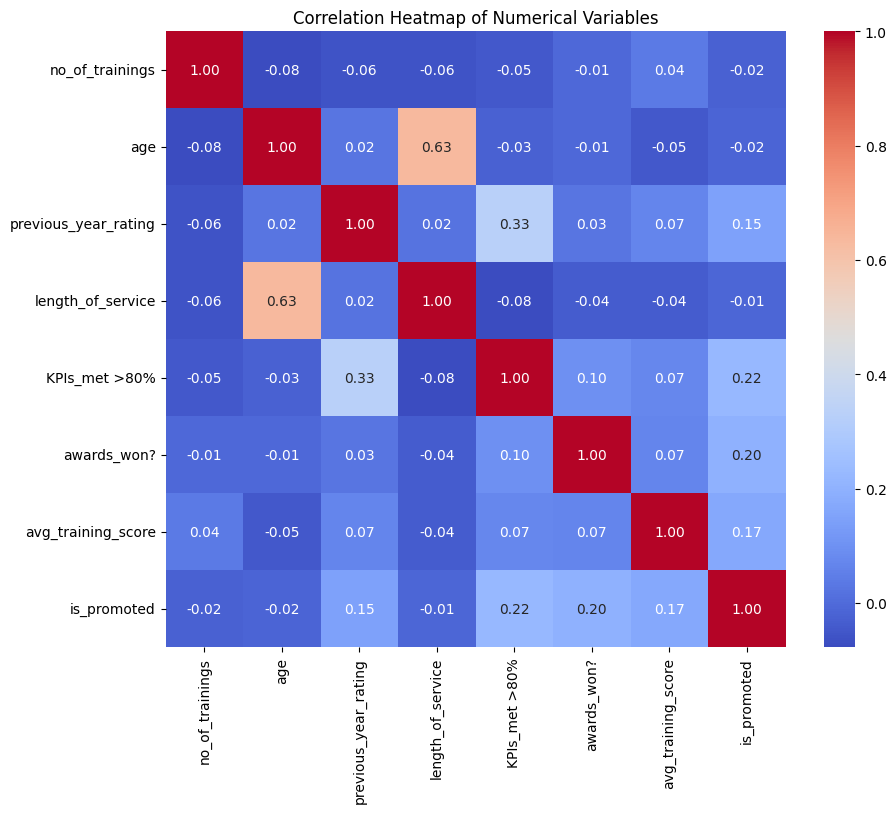

In [51]:
Numerical_columns = ['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted']

plt.figure(figsize=(10, 8))
sns.heatmap(hr_dataframe[Numerical_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

#Pairplot for Numerical insight

/tmp/ipython-input-1406234502.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='is_promoted', bbox_to_anchor=(1.05, 1), loc='upper left')


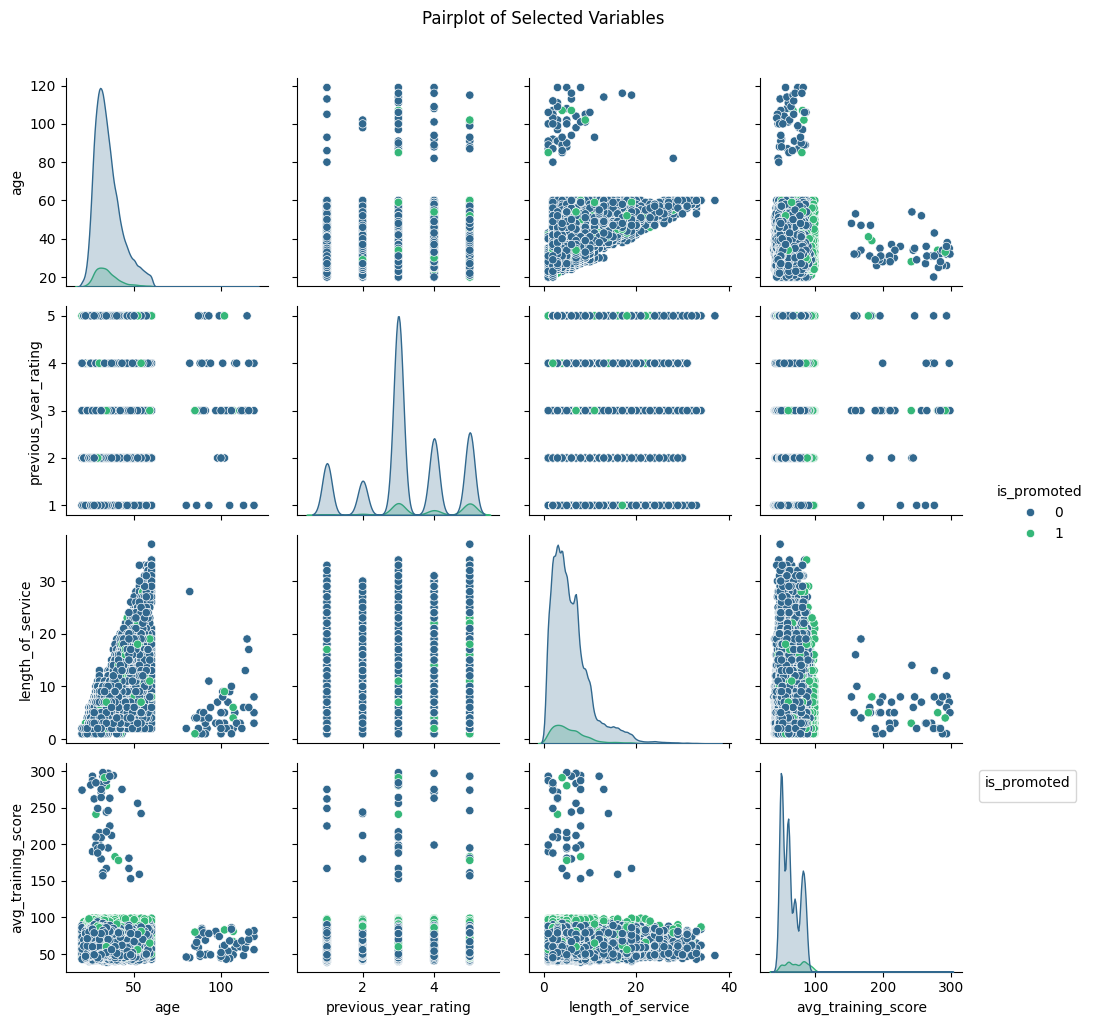

In [52]:
selected_columns = ['age', 'previous_year_rating', 'length_of_service', 'avg_training_score', 'is_promoted']


sns.pairplot(hr_dataframe[selected_columns], hue='is_promoted', palette='viridis')
plt.suptitle("Pairplot of Selected Variables", y=1.02)
plt.legend(title='is_promoted', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#Multivariate Interaction Insight

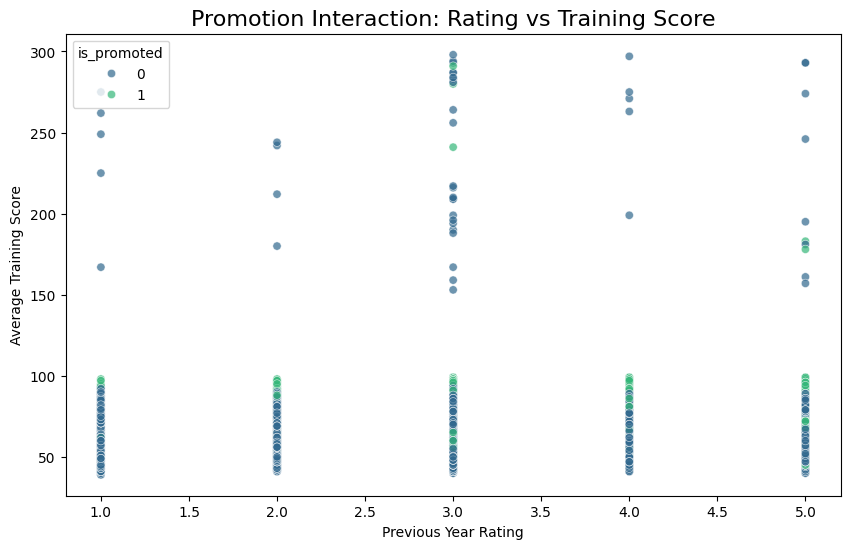

In [53]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=hr_dataframe,
    x='previous_year_rating',
    y='avg_training_score',
    hue='is_promoted',
    palette='viridis',
    alpha=0.7,
    legend='full'
)
plt.title("Promotion Interaction: Rating vs Training Score", fontsize=16)
plt.xlabel("Previous Year Rating")
plt.ylabel("Average Training Score")
plt.show()

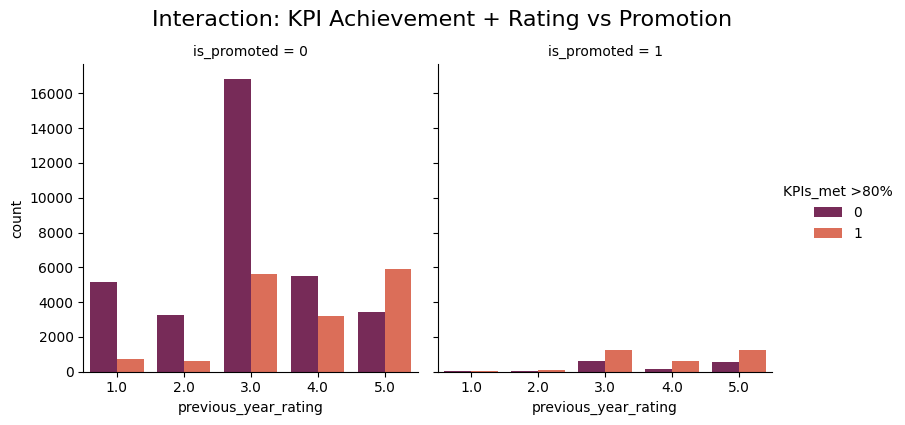

In [54]:
sns.catplot(
    data=hr_dataframe,
    x='previous_year_rating',
    hue='KPIs_met >80%',
    col='is_promoted',
    kind='count',
    height=4,
    aspect=1,
    palette='rocket'
)

plt.suptitle("Interaction: KPI Achievement + Rating vs Promotion", y=1.05, fontsize=16)
plt.show()

/tmp/ipython-input-1141309287.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=hr_dataframe, palette='viridis')


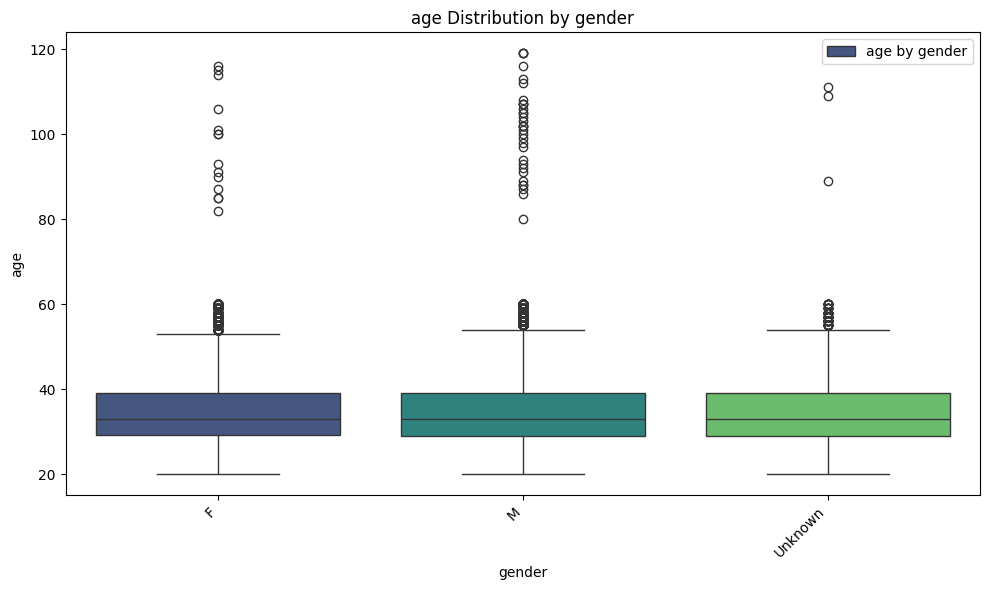

/tmp/ipython-input-1141309287.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=hr_dataframe, palette='viridis')


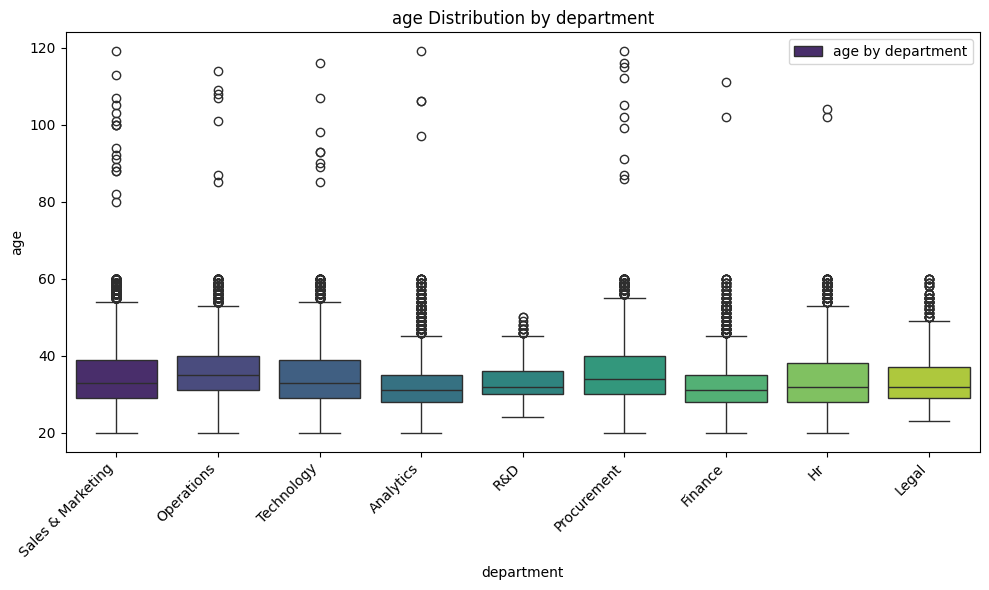

/tmp/ipython-input-1141309287.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=hr_dataframe, palette='viridis')


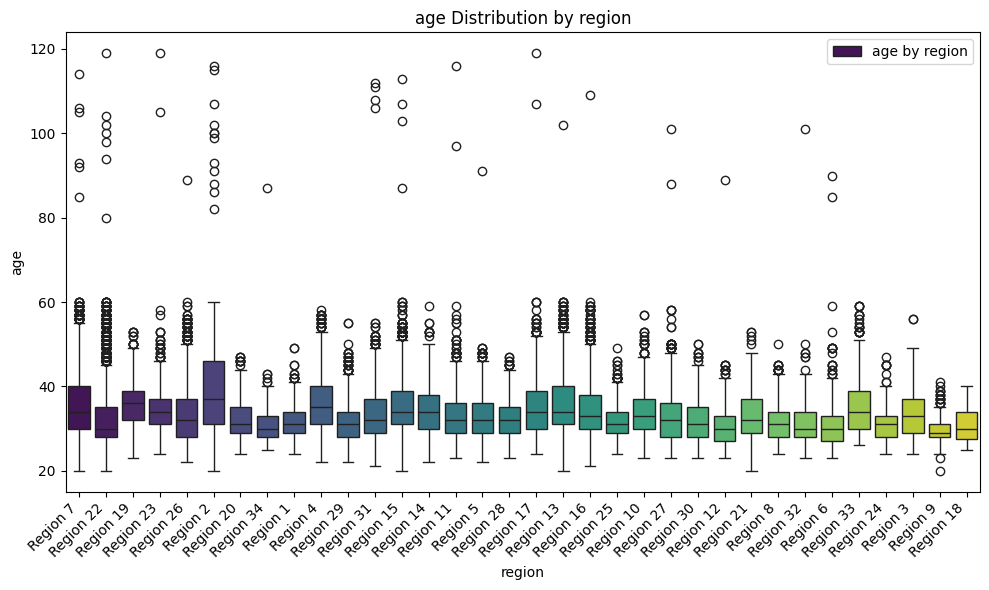

/tmp/ipython-input-1141309287.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=hr_dataframe, palette='viridis')


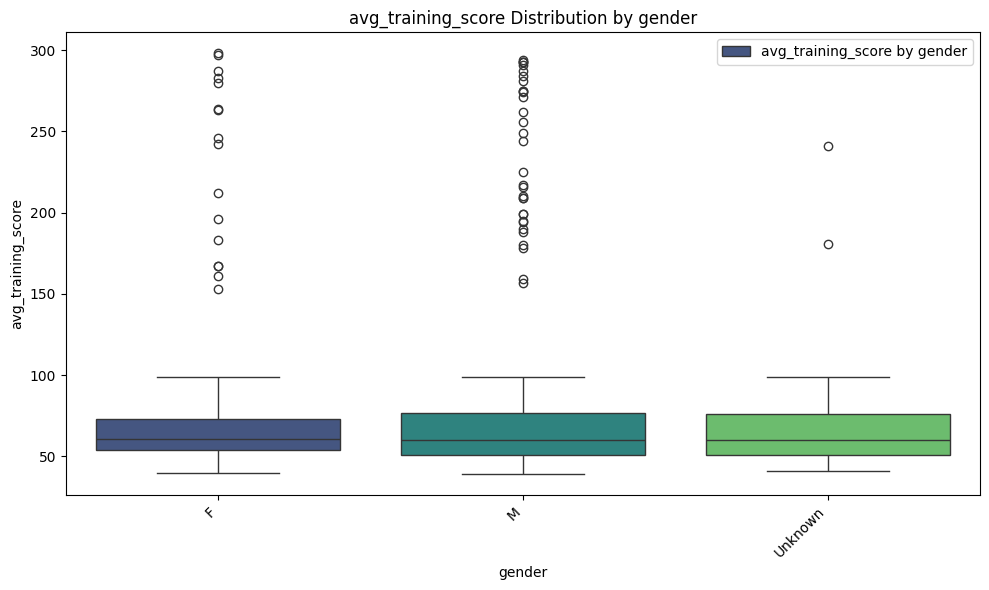

/tmp/ipython-input-1141309287.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=hr_dataframe, palette='viridis')


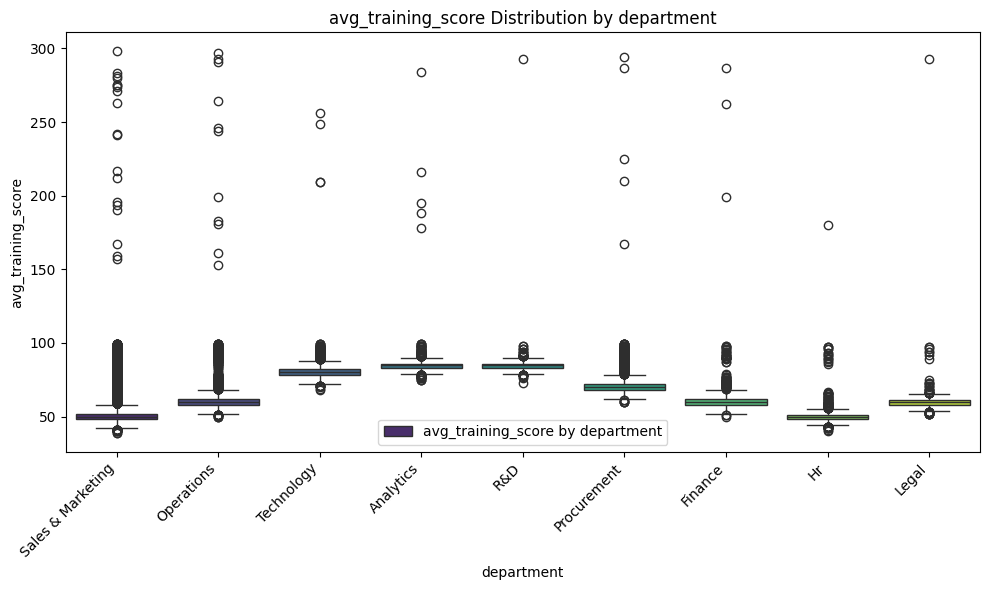

/tmp/ipython-input-1141309287.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=hr_dataframe, palette='viridis')


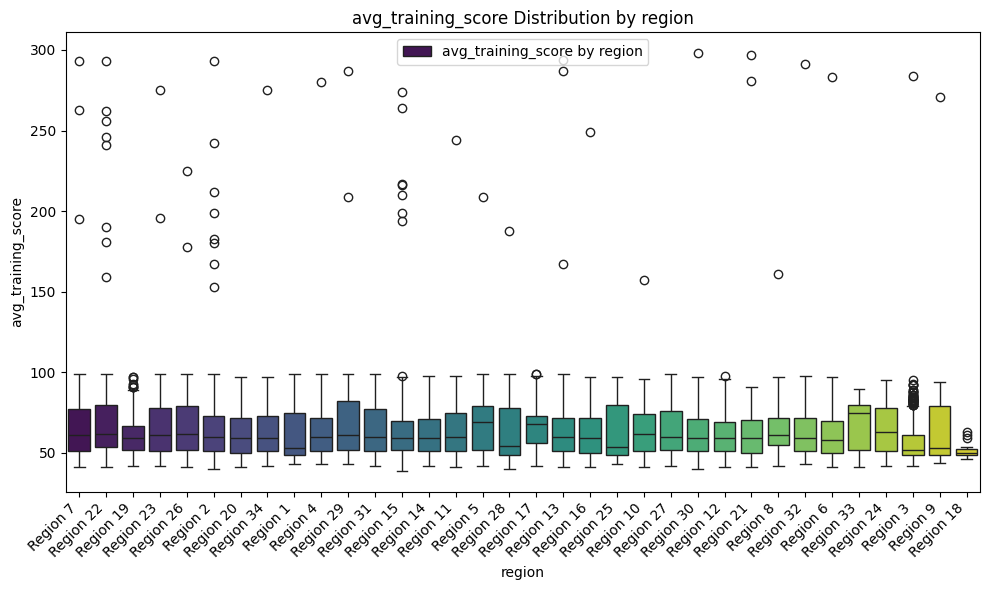

/tmp/ipython-input-1141309287.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=hr_dataframe, palette='viridis')


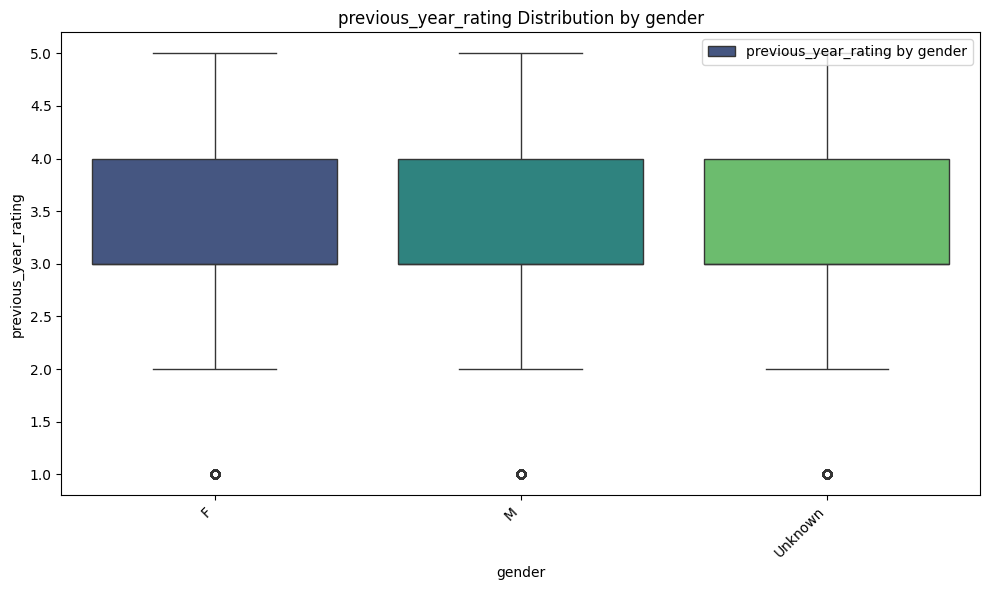

/tmp/ipython-input-1141309287.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=hr_dataframe, palette='viridis')


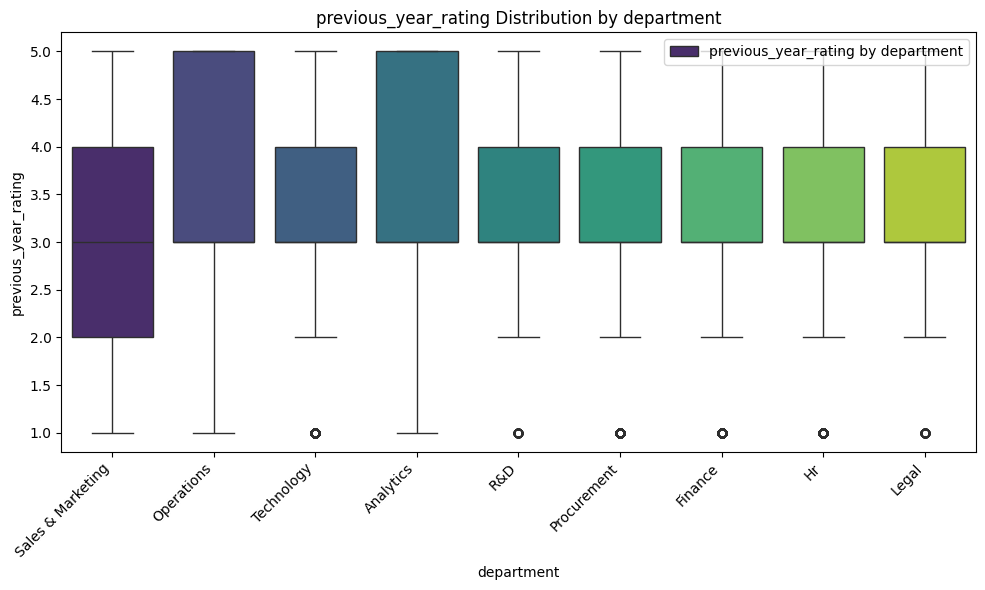

/tmp/ipython-input-1141309287.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=hr_dataframe, palette='viridis')


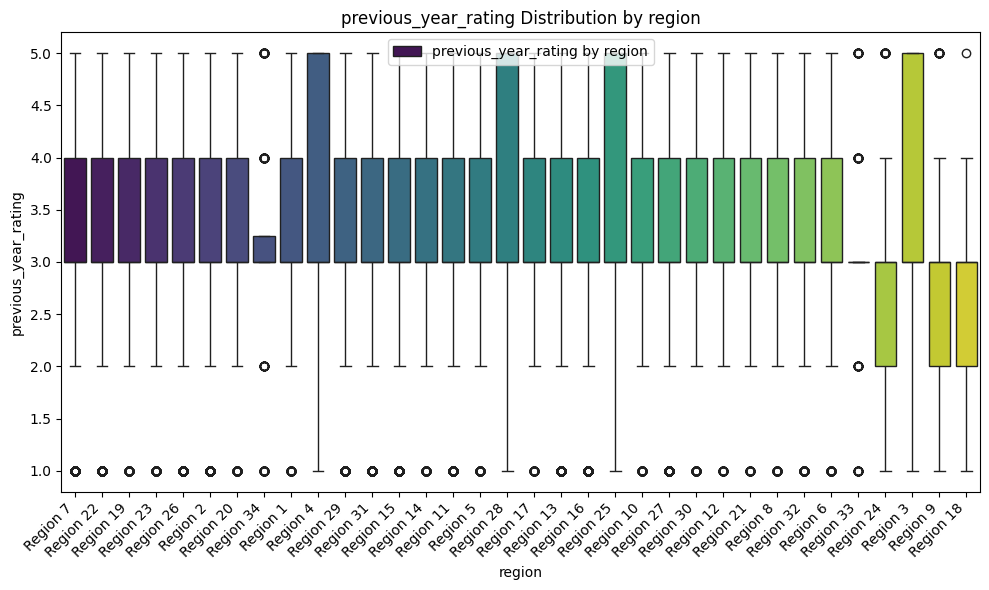

/tmp/ipython-input-1141309287.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=hr_dataframe, palette='viridis')


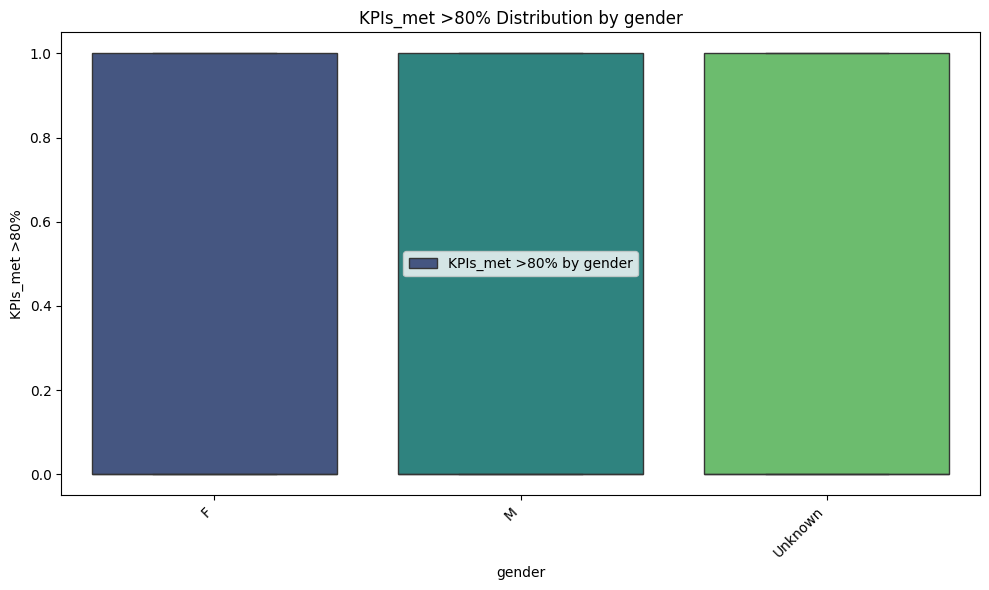

/tmp/ipython-input-1141309287.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=hr_dataframe, palette='viridis')


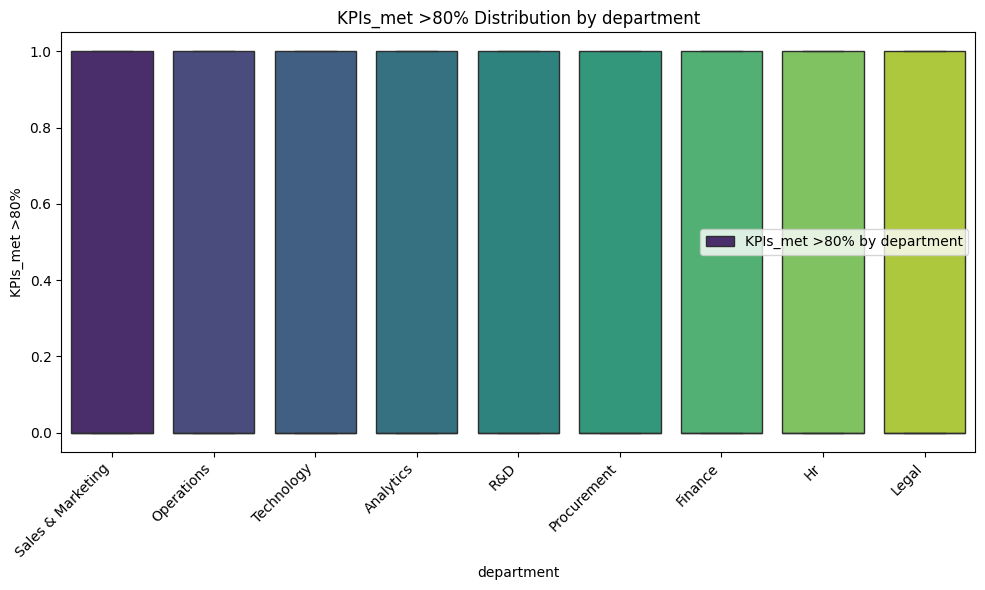

/tmp/ipython-input-1141309287.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=hr_dataframe, palette='viridis')


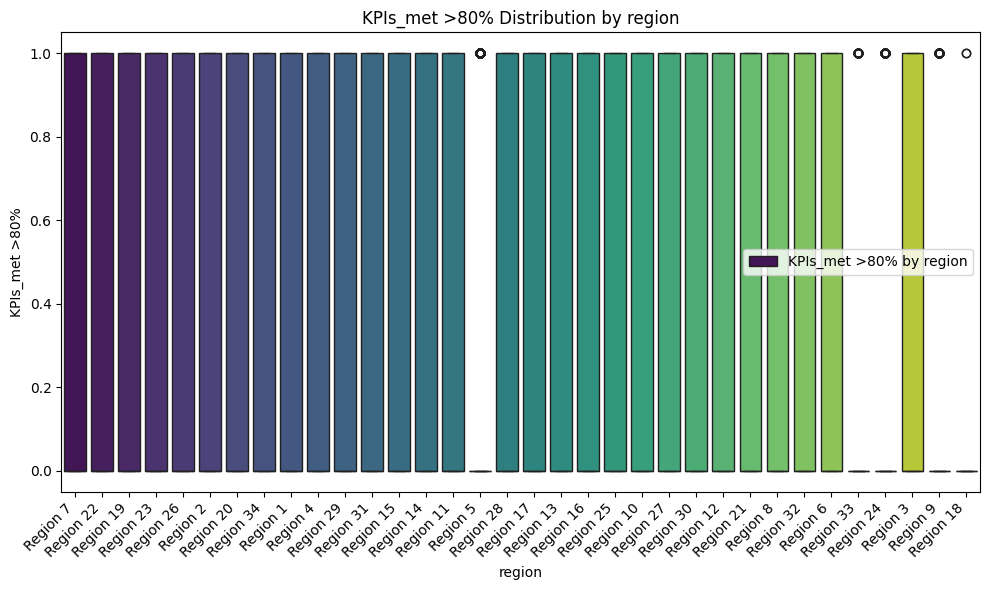

In [55]:
for num_col in numerical_cols:
    for cat_col in categorical_cols:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=cat_col, y=num_col, data=hr_dataframe, palette='viridis')
        plt.title(f'{num_col} Distribution by {cat_col}')
        plt.xlabel(cat_col)
        plt.ylabel(num_col)
        plt.xticks(rotation=45, ha='right')
        plt.legend([f'{num_col} by {cat_col}'])
        plt.tight_layout()
        plt.show()

##Correlation heatmap shows:

- Strongest predictors of promotion:

- Previous year rating

- KPI achievement

- Training score

- Age & length of service show almost no correlation with promotion.

##Pairplot shows:

Promoted employees cluster around high training score and high rating.

No separate clusters for age or service length.

##Multivariate Insight:

Employees with a combination of high performance rating and high training score have the highest promotion probability.
Employees who also meet KPI >80% are significantly more likely to be promoted than their peers.

#Task 6 - ML Prep

In [56]:
categorical_cols = ['department', 'region', 'education', 'gender', 'recruitment_channel']
numeric_cols = ['no_of_trainings', 'age', 'previous_year_rating',
                'length_of_service', 'avg_training_score']

target_col = 'is_promoted'

In [57]:
df_encoded = pd.get_dummies(hr_dataframe, columns=categorical_cols, drop_first=False)

print("Shape of DataFrame after one-hot encoding:", df_encoded.shape)

print("\nFirst 5 rows of the encoded DataFrame:")
print(df_encoded.head())

print("\nInformation about the encoded DataFrame:")
print(df_encoded.info())

Shape of DataFrame after one-hot encoding: (54808, 62)

First 5 rows of the encoded DataFrame:
   employee_id  no_of_trainings  age  previous_year_rating  length_of_service  \
0        65438                1   35                   5.0                  8   
1        65141                1   30                   5.0                  4   
2         7513                1   34                   3.0                  7   
3         2542                2   39                   1.0                 10   
4        48945                1   45                   3.0                  2   

   KPIs_met >80%  awards_won?  avg_training_score  is_promoted  \
0              1            0                  49            0   
1              0            0                  60            0   
2              0            0                  50            0   
3              0            0                  50            0   
4              0            0                  73            0   

   department_Analyti